# MNIST Introduction

- What is MNIST?
    MNIST : handwritten digits dataset
- Code : MNIST Classifier

In [ ]:
# Reading data 들어가기전에 기능알아보기

import torchvision.datasets as dsets

"""
생략
"""

mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

# root : MNIST 경로
# train = True : trainset불러옴
# train = False : testset불러옴
# transform = transforms.ToTensor() : MNIST를 불러올떄 어떤 TRANSFORM을 적용해 가져오나?
# download : root 에 MNIST자료가 없다면 다운을 받겠다.

data_loader = torch.utils.DataLoader(DataLoader = mnist_train, batch_size, shuffle=True, drop_last=True)
# DataLoader : 어떠한 데이터를 로드할지
# batch_size : 몇개씩 짤라서 불러올것인지 (여기선 100개)
# shuffle : 순서를 섞을지 순서대로 불를지
# drop_last : 100장씩 자를때 마지막에 남는 잔챙이들 버릴까? (True : 버린다)

for epoch in range(training_epochs) :
    for X, Y in data_loader :
        # X 는 MNIST IMG
        # Y 는 Lable 이 옵니다.
        
        X = X.view(-1, 28 * 28).to(device)
        # view를 이용해서 
        # X(B,1,28,28) 사이즈의 이미지 X를 View를 이용해서 (B,784) 로 변경하여 X로 다시 저장합니다.
    

# Epoch / Batch size / Iteration

__Epoch__ : 전체 데이터가 Training을 한번 끝냈을때, 1epoch    
__batch size__ : 전체 데이터를 효율적으로 잘라 학습시키기 위함   
__Iterations__ : batch를 몇번 학습에 사용했는가?? 1000개의 데이터를 500batch로 돌리면 2iterations을 학습에 사용했다고 합니다.  


### Softmax Classifier 를 이용하여 MNIST구현

In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

9920512it [00:02, 3412218.20it/s]                                                                                      


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


32768it [00:00, 34248.81it/s]                                                                                          


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw


1654784it [00:01, 1379630.22it/s]                                                                                      


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


8192it [00:00, 13107.43it/s]                                                                                           


Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...
Done!


In [5]:

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)
# LinearLayer의 입력 크기는 784 , 
# 출력 크기는 10 (0~9)의 숫자를 표현하기 때문

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs): #training_epochs : 15
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader: 
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187516
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180703
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440885
Learning finished


Accuracy: 0.8862999677658081
Label:  3
Prediction:  3


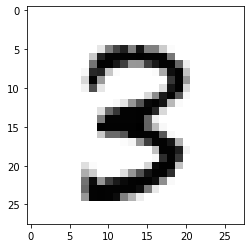

In [13]:
# Test the model using test sets
# grad를 계산 안하겠다
with torch.no_grad(): 
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1) # 무작위로 이미지를 뽑는다.
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data) # 우리가 학습한 레이어에 넣어서 확인
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()